### Module 3 Lab 2 Solution

1. Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

- Split the data into a training and a test set using train_test_split. 

- Use the LinearRegression class to learn a regression model on this data. 

- You can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("bike_day_raw.csv")
X = data.drop("cnt", axis=1)
y = data.cnt

display(data.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [4]:
from sklearn.linear_model import LinearRegression
import numpy

lr = LinearRegression().fit(X_train, y_train)

print(lr.score(X_train, y_train))
ybar = numpy.sum(y_train)/len(y_train)          # or sum(y)/len(y)
ssreg = numpy.sum((lr.predict(X_train)-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = numpy.sum((y_train - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
print(ssreg / sstot)

print(lr.score(X_test, y_test))


0.5328925529498699
0.5328925529498698
0.4991033756876271


2. Load the diabetes dataset using sklearn.datasets.load_diabetes.
- Scale the dataset (you can be creative and make pipelines)
- Apply LinearRegression, 
- Apply Ridge and do grid search 
- Apply Lasso and do grid search
- Visualize the coefficients.


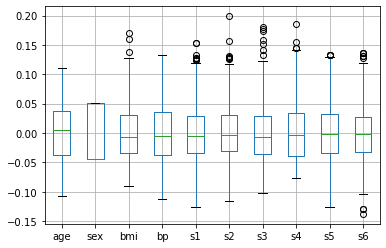

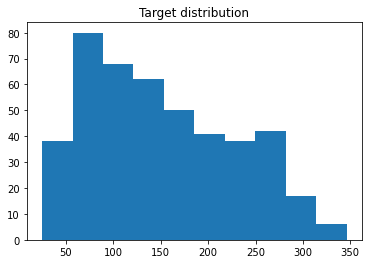

In [5]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_diabetes
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

diabetes = load_diabetes()

# create dataframe for easy boxplot
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.boxplot()

plt.figure()
plt.title("Target distribution")
plt.hist(diabetes.target, bins="auto")

X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target)


Linear regression w/ scaling: 0.46894845696632537
Ridge regression w/ scaling: 0.47052967021791836


Text(0.5, 1.0, 'Ridge grid search')

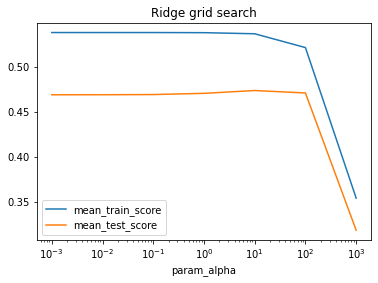

In [6]:

# With scaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scores_lr = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=10)
print("Linear regression w/ scaling:", scores_lr.mean())
scores_ridge = cross_val_score(Ridge(), X_train_scaled, y_train, cv=10)
print("Ridge regression w/ scaling:", scores_ridge.mean())

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train_scaled, y_train)

res = pd.DataFrame(grid.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Ridge grid search")


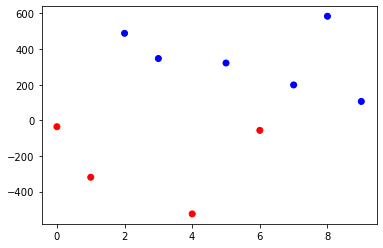

In [7]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_train.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")


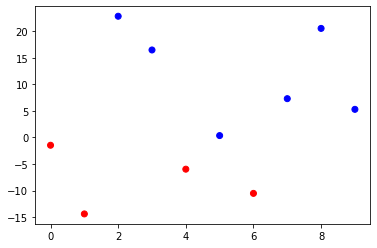

In [8]:
ridge = grid.best_estimator_
plt.scatter(range(X_train.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")


In [9]:
param_grid = {'alpha': np.logspace(-3, 0, 13)}
print(param_grid)

{'alpha': array([0.001     , 0.00177828, 0.00316228, 0.00562341, 0.01      ,
       0.01778279, 0.03162278, 0.05623413, 0.1       , 0.17782794,
       0.31622777, 0.56234133, 1.        ])}


In [10]:
grid = GridSearchCV(Lasso(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

/Users/gceran/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=10, estimator=Lasso(max_iter=1000000.0, normalize=True),
             iid=False,
             param_grid={'alpha': array([0.001     , 0.00177828, 0.00316228, 0.00562341, 0.01      ,
       0.01778279, 0.03162278, 0.05623413, 0.1       , 0.17782794,
       0.31622777, 0.56234133, 1.        ])},
             return_train_score=True)

In [11]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.1}
0.47667873696118457


In [12]:
grid.score(X_test, y_test)

0.43083075264606996

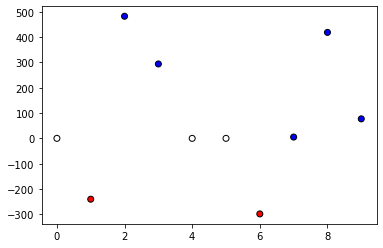

In [13]:
lasso = grid.best_estimator_
plt.scatter(range(X_train.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r", edgecolor='k')
